In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_table('Fig6A.csv',sep='\t')
df.head()

,Chromosome,Position,LR,Alpha
0,Chr1,346,0.03168,725291
1,Chr1,100766,0.02193,244232
2,Chr1,201186,0.90380,11084
3,Chr1,301606,0.10234,91664
4,Chr1,402025,0.01039,316358


In [6]:
space=4000000
Chr1=30427671 / 2 
Chr2=30427671 + 19698289 / 2 + space
Chr3=30427671 + 19698289 + 23459830 / 2 + space * 2
Chr4=30427671 + 19698289 + 23459830 + 18585056 / 2 + space * 3
Chr5=30427671 + 19698289 + 23459830 + 18585056 + 26975502 / 2 + space * 4

In [4]:
space=4000000
df['Genome'] = np.select([df['Chromosome'] == 'Chr1', 
                          df['Chromosome'] == 'Chr2', 
                          df['Chromosome'] == 'Chr3', 
                          df['Chromosome'] == 'Chr4', 
                          df['Chromosome'] == 'Chr5'],
                         [df['Position'], 
                          df['Position'] + 30427671 + space, 
                          df['Position'] + 30427671 + 19698289 + space * 2,
                          df['Position'] + 30427671 + 19698289 + 23459830 + space * 3,
                          df['Position'] + 30427671 + 19698289 + 23459830 + 18585056 + space * 4])
df.head()

,Chromosome,Position,LR,Alpha,Genome
0,Chr1,346,0.03168,725291,346
1,Chr1,100766,0.02193,244232,100766
2,Chr1,201186,0.90380,11084,201186
3,Chr1,301606,0.10234,91664,301606
4,Chr1,402025,0.01039,316358,402025


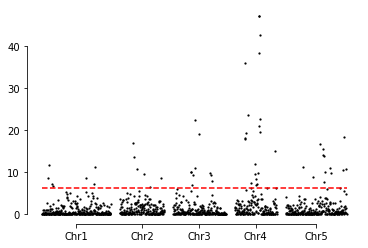

In [13]:
sns.scatterplot(x='Genome',
                y='LR',
                data=df,
                marker='o',
                color='0',
                s=5,
                linewidth=0)
colors = plt.cm.cividis(np.linspace(0,1,5))
plt.hlines(y=np.percentile(df['LR'],95),
             xmin=min(df['Genome']),
             xmax=max(df['Genome']),
             color='r',
             linestyle='--',
             zorder=6)
plt.xlabel('',fontsize=10)
plt.ylabel('',fontsize=10)
plt.xticks([Chr1,Chr2,Chr3,Chr4,Chr5],["Chr1", "Chr2", "Chr3", "Chr4", "Chr5"])
sns.despine(trim=True)
plt.savefig("Fig6A.png", format="png",bbox_inches="tight",facecolor="w",dpi=400)